In [119]:
import tensorflow as tf
import keras
from keras import layers

tf.random.set_seed(22)

In [120]:
import json
import numpy as np
import pandas as pd
from time import time
import random
import matplotlib.pyplot as plt
import os

In [121]:
name_model = "RWMDMAP-MP50"
with open("../examples/rez.json", "r") as f:
    dataset = json.load(f)

In [122]:
print("Первый x:\n", dataset["train_x"][0])
print("Последний, x:\n", dataset["train_x"][-1])
print("Размер x:\t", len(dataset["train_x"][0]))
print("Первый y:\t", dataset["train_y"][0])
print("Последний y:\t", dataset["train_y"][0])
print("Кол-во записей:\t", len(dataset["train_x"]))

Первый x:
 [0.8860845832053305, 0.3, 0.8860845832053305, 0.09157370929912602, 0.0, 0.9994059993535875, 0.0, 1.0, 0.8066037735849058, 0.6666666666666666, 0.8860845832053305, 0.3, 0.8860845832053305, 0.09157370929912602, 0.0, 0.9994059993535875, 0.0, 1.0, 0.8066037735849058, 0.6666666666666666, 0.3208079984714987, 0.3, 0.3208079984714987, 0.13736056394868904, 0.0, 1.0, 0.0, 0.9994059993535875, 1.0, 1.0, 0.8860845832053305, 0.3, 0.8860845832053305, 0.09157370929912602, 0.0, 0.9994059993535875, 0.0, 1.0, 0.8066037735849058, 0.6666666666666666, 0.8860845832053305, 0.3, 0.8860845832053305, 0.09157370929912602, 0.0, 0.9994059993535875, 0.0, 1.0, 0.8066037735849058, 0.6666666666666666, 0.6595553521877215, 0.2, 0.6595553521877215, 0.13736056394868904, 0.0, 1.0, 0.0, 1.0, 0.6650943396226415, 0.6666666666666666, 0.3935824714131887, 0.3, 0.3935824714131887, 0.09157370929912602, 0.0, 1.0, 0.0, 0.9982743731749958, 0.5754716981132076, 0.6666666666666666, 0.6595553521877215, 0.2, 0.6595553521877215, 0

In [123]:
train_x, train_y, val_x, val_y, test_x, test_y, = dataset["train_x"], dataset["train_y"], dataset["val_x"], dataset["val_y"], dataset["test_x"] , dataset["test_y"]

In [124]:
hist = []
model = keras.Sequential()

input_len = 500
output_len = 5

model.add(layers.Dense(units=input_len, activation='relu'))
model.add(layers.Dense(units=100,  activation='relu'))
model.add(layers.Dropout(rate=0.2, seed=22))
model.add(layers.Dense(units=50,  activation='relu'))
model.add(layers.Dropout(rate=0.2, seed=22))
model.add(layers.Dense(units=25,  activation='relu'))
model.add(layers.Dropout(rate=0.2, seed=22))
model.add(layers.Dense(units=output_len, activation='softmax'))

In [125]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [126]:
batch_size = 50
epochs = 15
history = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_data=(val_x, val_y))
hist.append(history)

Epoch 1/15
307/307 [==============================] - 6s 19ms/step - loss: 1.3294 - accuracy: 0.4163 - val_loss: 1.2021 - val_accuracy: 0.4842
Epoch 2/15
307/307 [==============================] - 1s 5ms/step - loss: 1.2093 - accuracy: 0.4805 - val_loss: 1.1634 - val_accuracy: 0.4931
Epoch 3/15
307/307 [==============================] - 1s 4ms/step - loss: 1.1567 - accuracy: 0.5054 - val_loss: 1.1224 - val_accuracy: 0.5176
Epoch 4/15
307/307 [==============================] - 1s 5ms/step - loss: 1.1107 - accuracy: 0.5230 - val_loss: 1.1047 - val_accuracy: 0.5252
Epoch 5/15
307/307 [==============================] - 1s 5ms/step - loss: 1.0661 - accuracy: 0.5434 - val_loss: 1.0729 - val_accuracy: 0.5392
Epoch 6/15
307/307 [==============================] - 1s 4ms/step - loss: 1.0226 - accuracy: 0.5649 - val_loss: 1.0388 - val_accuracy: 0.5476
Epoch 7/15
307/307 [==============================] - 1s 4ms/step - loss: 0.9852 - accuracy: 0.5700 - val_loss: 1.0389 - val_accuracy: 0.5505
Epoch

In [127]:
loss_and_metrics = model.evaluate(test_x, test_y, batch_size=batch_size)
loss_and_metrics

96/96 [==============================] - 0s 1ms/step - loss: 1.1756 - accuracy: 0.5570


[1.1756000518798828, 0.5569937229156494]

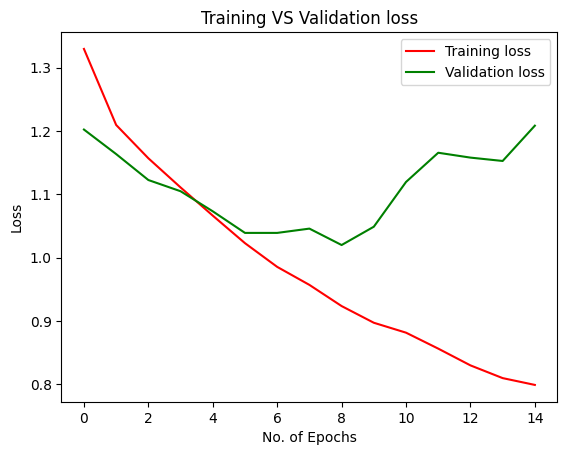

In [128]:
plt.plot(np.concatenate([h.history['loss'] for h in hist]), 'r', label='Training loss')
plt.plot(np.concatenate([h.history['val_loss'] for h in hist]), 'g', label='Validation loss')
plt.title('Training VS Validation loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

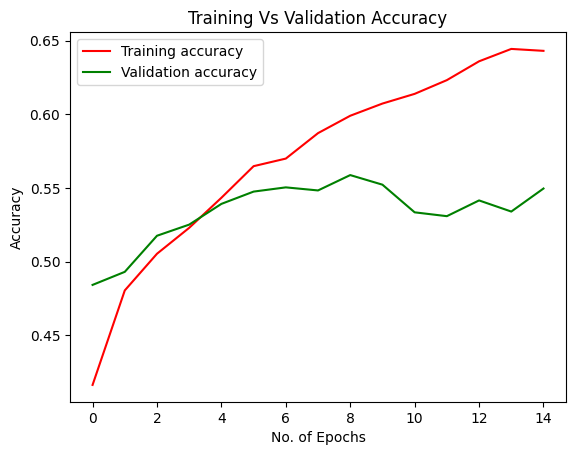

In [129]:
plt.plot(np.concatenate([h.history['accuracy'] for h in hist]), 'r', label='Training accuracy')
plt.plot(np.concatenate([h.history['val_accuracy'] for h in hist]), 'g', label='Validation accuracy')
plt.title('Training Vs Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [63]:
class ExportModule(tf.Module):
  def __init__(self, model, preprocess, class_pred):
    # Initialize pre and postprocessing functions
    self.model = model
    self.preprocess = preprocess
    self.class_pred = class_pred

  @tf.function(input_signature=[tf.TensorSpec(shape=[None, input_len], dtype=tf.float32)]) 
  def __call__(self, x):
    # Run the ExportModule for new data points
    x = self.preprocess(x)
    y = self.model(x)
    print(y)
    y = self.class_pred(y)
    return y

In [64]:
def preprocess_test(x):
  return x

def class_pred_test(y):
  # Generate class predictions from MLP output
  return y

In [65]:
mlp_model_export = ExportModule(model=model,
                                preprocess=preprocess_test,
                                class_pred=class_pred_test)

In [66]:
save_path = name_model
tf.saved_model.save(mlp_model_export, save_path)
mlp_loaded = tf.saved_model.load(save_path)

Tensor("sequential_6/dense_34/Softmax:0", shape=(None, 5), dtype=float32)
INFO:tensorflow:Assets written to: RWMDMAP-MP50/assets


INFO:tensorflow:Assets written to: RWMDMAP-MP50/assets


In [67]:
def accuracy_score(y_pred, y):
  # Generic accuracy function
  is_equal = tf.equal(y_pred, y)
  return tf.reduce_mean(tf.cast(is_equal, tf.float32))

test_classes = mlp_loaded(test_x)
test_acc = accuracy_score([np.argmax(y) for y in test_classes], [np.argmax(y) for y in test_y])
print(f"Test Accuracy: {test_acc:.3f}")

Test Accuracy: 0.516


In [68]:
mlp_loaded(test_x)

<tf.Tensor: shape=(1295, 5), dtype=float32, numpy=
array([[6.4880654e-02, 3.3612213e-01, 9.7116753e-02, 3.1173924e-01,
        1.9014119e-01],
       [2.1704789e-01, 1.7669578e-01, 3.0823311e-02, 2.4166308e-01,
        3.3376995e-01],
       [1.1044737e-02, 2.3215912e-02, 9.6224147e-01, 3.0689542e-03,
        4.2894846e-04],
       ...,
       [2.8296837e-01, 7.7785142e-02, 1.3100776e-02, 8.6066000e-02,
        5.4007965e-01],
       [3.4336811e-01, 6.7741305e-02, 1.7692354e-02, 7.8692436e-02,
        4.9250585e-01],
       [2.2092139e-02, 4.2929411e-01, 2.1170320e-03, 4.0877238e-01,
        1.3772438e-01]], dtype=float32)>